In [5]:
# 필요 라이브러리 임포트

import numpy as np
import imgaug.augmenters as iaa
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import os

In [6]:
# 데이터 경로 설정

sample_img_path = os.getenv("HOME") + '/aiffel/data_augmentation/images/mycat.jpg'
sample_img_path

'/home/aiffel/aiffel/data_augmentation/images/mycat.jpg'

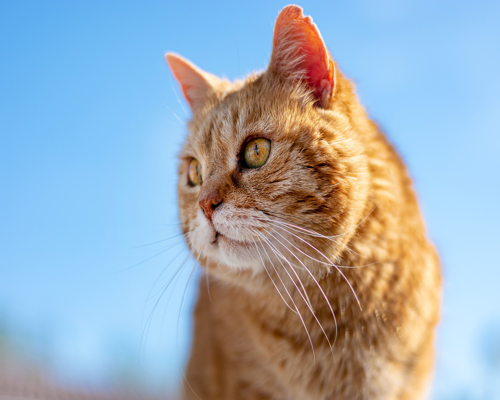

In [7]:
# 이미지 리사이징

image = Image.open(sample_img_path).resize((500, 400))
image_tensor = tf.keras.preprocessing.image.img_to_array(image)

image

In [8]:
# imgaug 에서는 배열을 이미지의 기본 형태로 사용
# PIL Image 데이터형을 넘파이 배열로 변환하여 사용

image_arr = np.array(image)

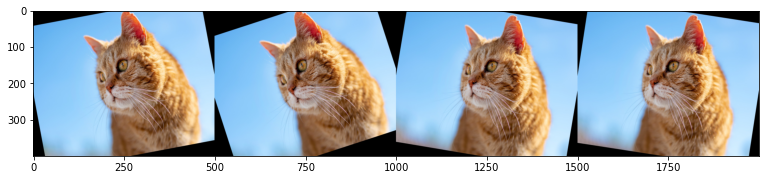

In [11]:
# iaa.Affine()  적용

# imgaug.augmenters 의 Affine() 은 아핀변환 (Affine transform) 을 적용
# 2D 변환의 일종이며, 이미지 스케일 (scale) 을 조절하거나 평행이동, 회전 등의 변환 가능

# -25도 ~ 25도 사이에 랜덤한 각도를 변환하는 augmentaion 을 수행

images = [image_arr, image_arr, image_arr, image_arr]
rotate = iaa.Affine(rotate = (-25, 25))
images_aug = rotate(images = images)

plt.figure(figsize = (13, 13))
plt.imshow(np.hstack(images_aug))

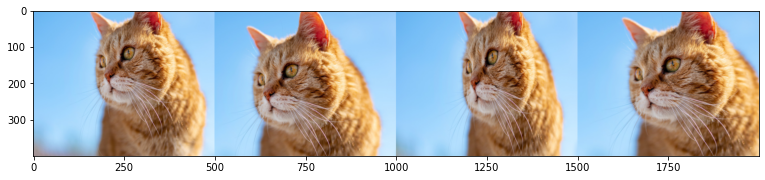

In [12]:
# iaa.Crop() 기법 적용

# Crop 하려는 원본 이미지의 비율을 매개변수로 사용하여 이미지 생성

images = [image_arr, image_arr, image_arr, image_arr]
crop = iaa.Crop(percent = (0, 0.2))
images_aug = crop(images = images)

plt.figure(figsize = (13, 13))
plt.imshow(np.hstack(images_aug))

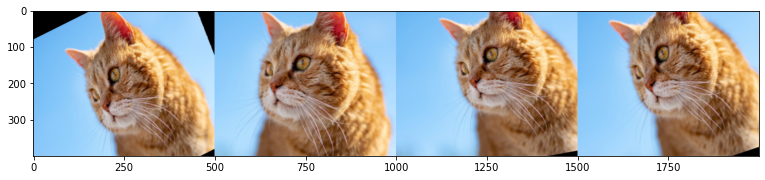

In [13]:
# iaa.Sequential() 기법 적용 (rotate, crop 을 조합하여 적용)

# agumentation 기법을 한번에 조립하여 사용하는 방법으로, 순차적으로 적용

images = [image_arr, image_arr, image_arr, image_arr]
rotate_crop = iaa.Sequential([iaa.Affine(rotate = (-25, 25)), 
                              iaa.Crop(percent = (0, 0.2))])

images_aug = rotate_crop(images = images)

plt.figure(figsize = (13, 13))
plt.imshow(np.hstack(images_aug))

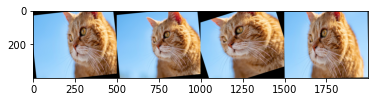

In [16]:
# iaa.Sequential() 에서 random 으로 기법의 순서를 바꾸서 사용

images = [image_arr, image_arr, image_arr, image_arr]
rotate_crop = iaa.Sequential([iaa.Crop(percent = (0, 0.2)), 
                              iaa.Affine(rotate = (-25, 25))], 
                              random_order = True)
images_aug = rotate_crop(images = images)

plt.imshow(np.hstack(images_aug))

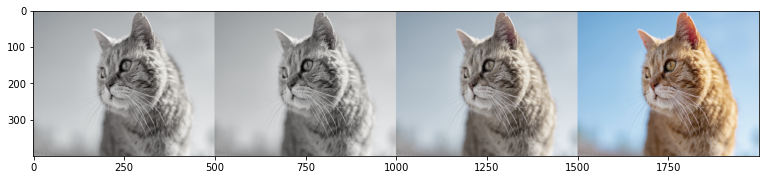

In [17]:
# iaa.Sequential() 기법을 사용할 때, 여러개의 적용할 기법 중 하나를 선택하는 방법
# iaa.OneOf() 를 사용하여 여러 선택지 중 하나만 적용

images = [image_arr, image_arr, image_arr, image_arr]
seq = iaa.OneOf([iaa.Grayscale(alpha = (0.0, 1.0)), 
                 iaa.AddToSaturation((-50, 50))])
images_aug = seq(images = images)

plt.figure(figsize = (13, 13))
plt.imshow(np.hstack(images_aug))

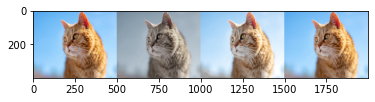

In [20]:
# 일정 확률로 augmentation의 기법들을 선택하는 기법

# iaa.Sometimes() : iaa.OneOf() 처럼 활용이 가능

images = [image_arr, image_arr, image_arr, image_arr]
seq = iaa.Sequential([iaa.Sometimes(0.6, iaa.AddToSaturation((-50, 50))), 
                      iaa.Sometimes(0.2, iaa.Grayscale(alpha = (0.0, 1.0)))])
images_aug = seq(images = images)

plt.imshow(np.hstack(images_aug))

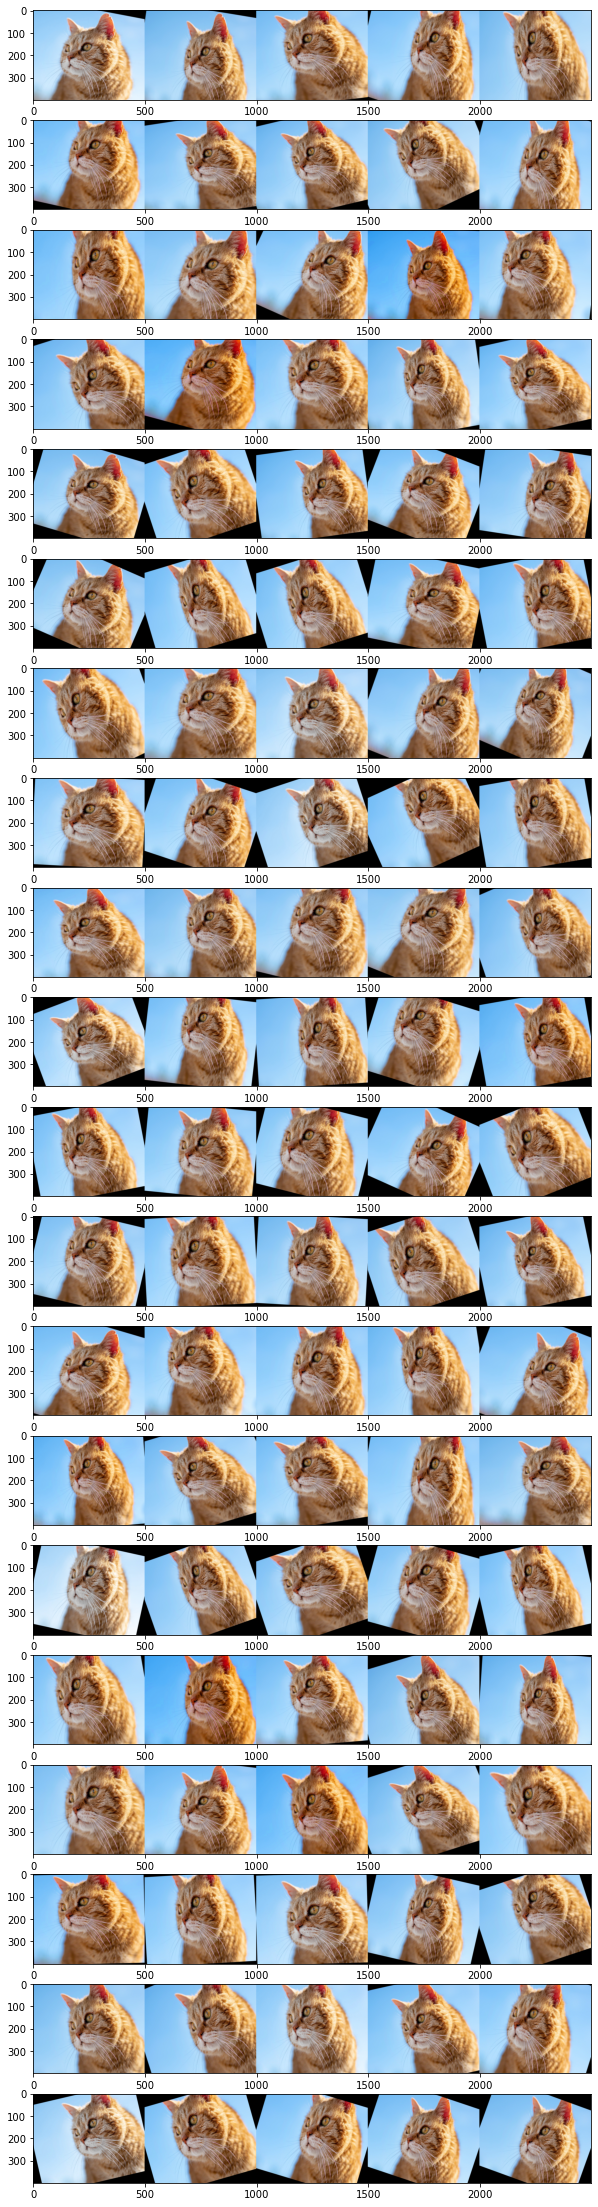

In [21]:
# iaa.Sequtntial(), iaa.OneOf(), iaa.Sometimes() 를 활용하여 다양한 조합 생성

# 100개의 이미지를 시각화

seq = iaa.Sequential([iaa.OneOf([iaa.Grayscale(alpha = (0.0, 0.1)), 
                                 iaa.Sometimes(0.5, iaa.AddToSaturation((-50, 50)))]), 
                                 iaa.Sequential([iaa.Crop(percent = (0, 0.2)), 
                                 iaa.Affine(rotate = (-25, 25))], 
                                 random_order = True)])

plt.figure(figsize = (10, 40))

for i in range(20) : 
    images = [image_arr, image_arr, image_arr, image_arr, image_arr]
    images_aug = seq(images = images)
    
    plt.subplot(20, 1, i + 1)
    plt.imshow(np.hstack(images_aug))
    
plt.show()